In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
import sys
path = os.path.abspath('..')
sys.path.append(path)
import pickle
import nltk

# from essay_grader.neuralize import Neuralizer
# from essay_grader.bibliography import remove_all
from essay_grader.remove_stopwords import remove_stopwords
from essay_grader.utils import plot_feature
# from essay_grader.vectorize import doc2vec_vectorize
# from essay_grader.punctuation import clean_string
# from essay_grader.lemmatize import lemmatize
from essay_grader.title_text_similarity import gen_title_text_similarity_features
from essay_grader.text_feature import gen_text_feature

# from nltk.corpus import wordnet 
# import stanza
# stanza.download('en')


# import re
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from itertools import chain, combinations
import spacy
nlp = spacy.load("en_core_web_lg")
# import itertools



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('../essay_grader/data/essay_data.csv')


In [15]:
df = gen_title_text_similarity_features(df)

2020-08-27 17:39:09 WARNING: Can not find mwt: default from official model list. Ignoring it.
2020-08-27 17:39:09 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| pos       | ewt     |
| lemma     | ewt     |

2020-08-27 17:39:09 INFO: Use device: cpu
2020-08-27 17:39:09 INFO: Loading: tokenize
2020-08-27 17:39:09 INFO: Loading: pos
2020-08-27 17:39:11 INFO: Loading: lemma
2020-08-27 17:39:11 INFO: Done loading processors!


In [32]:
# df.to_pickle('../essay_grader/pickle_data/text_to_text_similarity.pkl')
df1=pd.read_pickle('../essay_grader/pickle_data/lemma_df.pkl')

In [38]:
df.columns

Index(['text', 'year', 'name', 'title', 'score', 'level', 'title_name',
       'vocab_richness', 'mean_word_syllable', 'word_count', 'sentence_count',
       'avg_sentence_length', 'count_stopwords', 'flesch_reading_ease',
       'freq_wok_words', 'freq_aok_words', 'freq_cliche_words',
       'freq_argument_words', 'freq_absolute_words', 'title_key_word',
       'frequency_title_words', 'ids_from_text', 'upos_from_text',
       'lemmas_from_text', 'unnested_lemmas', 'unique_unnested_lemmas_count',
       'unested_upos_from_text', 'num_upos', 'perc_noun', 'perc_pronoun',
       'perc_punct'],
      dtype='object')

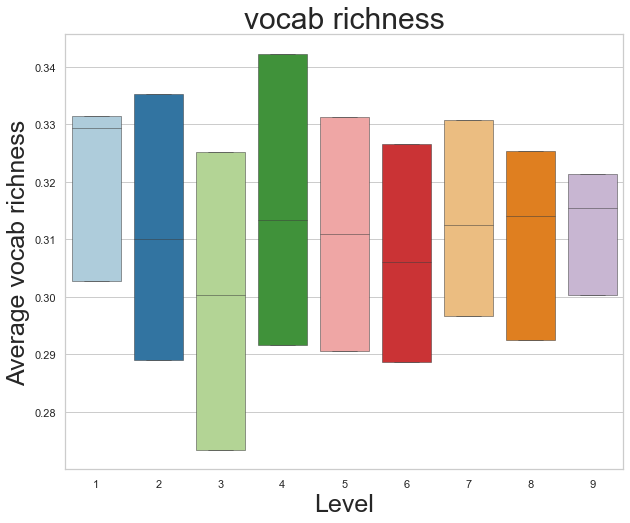

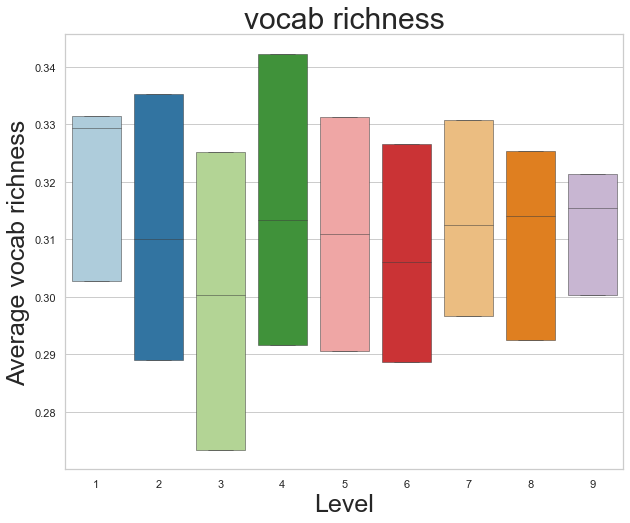

In [45]:
plot_feature(df['score'], df['vocab_richness'])

In [47]:
list1 = ['cat']
list2 = ['animal', 'plant', 'bird']
y = (list1, list2)
def print_combinations(x):
    list_of_similarities =[]
    for token1 in x[0]:
        token1 = nlp(token1)
        for token2 in x[1]:
            token2 = nlp(token2)
            list_of_similarities.append(token1.similarity(token2))
    return list_of_similarities
            
print_combinations(y)


[0.6260400283304591,
 0.30015555434239755,
 0.47534105184759606,
 0.4387127416325034]

In [48]:
token_similarity_two_lists(y)

[0.6260400283304591,
 0.30015555434239755,
 0.47534105184759606,
 0.4387127416325034]

In [45]:
def token_similarity_two_lists(doc):
    list_of_similarities =[]
    for token1 in doc[0]:
        token1 = nlp(token1)
        for token2 in doc[1]:
            token2 = nlp(token2)
            list_of_similarities.append(token1.similarity(token2))
    return list_of_similarities

In [44]:
%%time
df['verb_title_to_text_similarity'] = df.apply(lambda x: token_similarity_two_lists( ([x['text_verb_lemmas']],[x['title_key_word_verb']]) ), axis=1)
df['noun_title_to_text_similarity'] = df.apply(lambda x: token_similarity_two_lists( ([x['text_noun_lemmas']],[x['title_key_word_noun']])), axis=1)


TypeError: Argument 'string' has incorrect type (expected str, got list)

In [ ]:
df['verb_title_to_text_similarity'] = None
for i, _ in df.iterrows():
#     try:
    df.at[i,'verb_title_to_text_similarity'] = token_similarity_two_lists((df.at[i,'text_verb_lemmas'],df.at[i,'title_key_word_verb']))
    print('done with row ' + str(i))
#     except:
#         print('There is an issue with row ' + str(i))
    

done with row 0
done with row 1


/Users/davidchadsey/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  


done with row 2
done with row 3
done with row 4
done with row 5
done with row 6
done with row 7
done with row 8
done with row 9
done with row 10
done with row 11
done with row 12
done with row 13
done with row 14
done with row 15
done with row 16
done with row 17
done with row 18
done with row 19
done with row 20
done with row 21
done with row 22
done with row 23
done with row 24
done with row 25
done with row 26
done with row 27
done with row 28
done with row 29
done with row 30
issues with try and pattern
issues with try and find
issues with try and exist
issues with understand and pattern
issues with understand and find
issues with understand and exist
issues with falsify and pattern
issues with falsify and find
issues with falsify and exist
issues with alter and pattern
issues with alter and find
issues with alter and exist
issues with justified and pattern
issues with justified and find
issues with justified and exist
issues with live and pattern
issues with live and find
issues w

##  Extracting just N and V from text

In [8]:
def token_similarity(doc):
    list_of_similarities =[]
    for token1 in doc:
        for token2 in doc:
            list_of_similarities.append(token1.similarity(token2))
    return list_of_similarities

In [17]:
def calculate_self_similarities(df, pos):
    new_column = 'text_' + str(pos).lower() + '_lemmas_similarities'
    df[new_column] = None
    target_column = 'text_' + str(pos).lower() + '_lemmas'
    print(target_column, new_column)
    
    similarity_dict = {}

    for j,_ in df.iterrows():
        tuple_pairs = list(itertools.combinations(df[target_column][j], 2))
        similarity_number = []
        print(len(tuple_pairs))
        for i in range(len(tuple_pairs)):
            (a, b) = tuple_pairs[i]
            if (a,b) not in similarity_dict.keys() and (b,a) not in similarity_dict.keys():
                try:
                    x, _, y = nlp("{} and {}".format(a, b))
                    similarity_dict[(a, b)] = x.similarity(y)           
                except:
                    continue
            try:
                similarity_number.append(similarity_dict[(a,b)])
            except:
                similarity_number.append(similarity_dict[(b,a)])
        df.at[j,new_column] = similarity_number
        print('complted row ' + str(j) + ' and the length of the dictionary is '  + str(len(similarity_dict.keys())))
    return df

%time
new_df = calculate_self_similarities(df, 'NOUN')

## Graphing Code

In [57]:
import seaborn as sns
sns.set()
import numpy as np

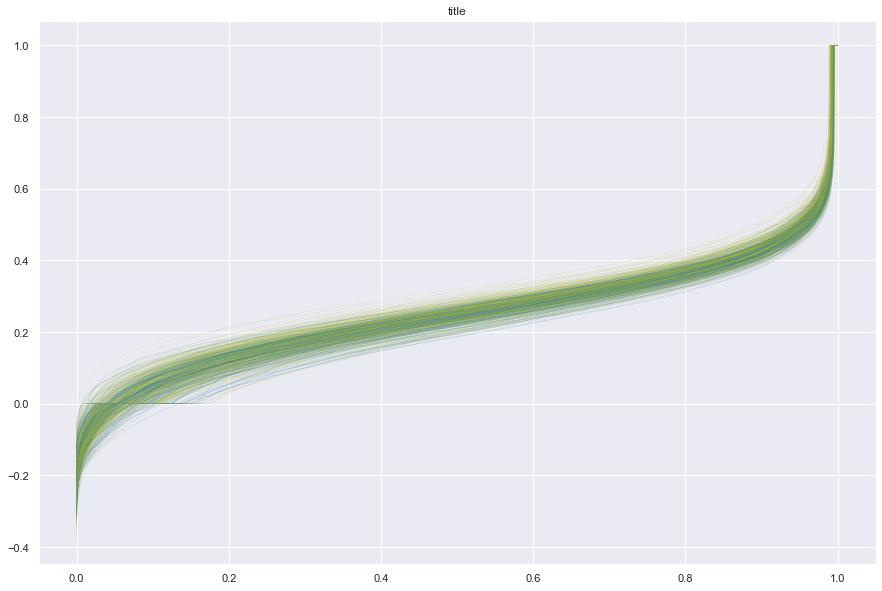

In [58]:
fig = plt.figure(num = None, figsize=(15,10), )
ax = fig.add_subplot(1, 1,1)
title = "title"
ax.set_title(title)
# ax.set( xscale="log")
lw = 0.2
alpha = 0.5
for i, row in df.iterrows():
    length = len(row['text_noun_lemmas_similarities'])
    j = np.arange(length)
    if row['level'] == 1:     
        ax.plot(j/length, sorted(row['text_noun_lemmas_similarities']), color = "tab:olive", linewidth = lw, alpha = alpha)
    elif row['level'] == 2:
        ax.plot(j/length, sorted(row['text_noun_lemmas_similarities']), color = "tab:olive", linewidth = lw, alpha =  alpha)
    elif row['level'] == 3:
        ax.plot(j/length, sorted(row['text_noun_lemmas_similarities']), color = "tab:blue", linewidth = lw, alpha =  alpha)
    elif row['level'] == 4:
        ax.plot(j/length, sorted(row['text_noun_lemmas_similarities']), color = "tab:blue", linewidth = lw, alpha =  alpha)
    else:
        ax.plot(j/length, sorted(row['text_noun_lemmas_similarities']), color = "tab:purple", linewidth = lw, alpha =  alpha)

plt.show()

<AxesSubplot:xlabel='level', ylabel='unnested_lemmas_count'>

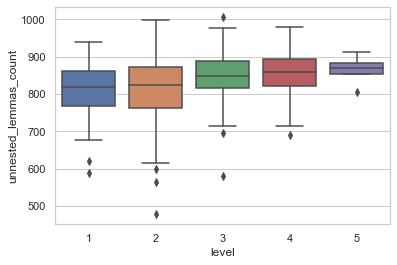

In [12]:
def plot_feature(level, data):
    fig = plt.figure( figsize=(10,8) )
    sns.set(style="whitegrid")
    title = (' ').join((data.name).split('_'))
    y_axis = 'Average ' + title
    ax = sns.barplot(level, data, ci='sd', capsize=.1,  palette="ch:2,-.1,dark=.7")
    ax.set_title(title, fontsize = 30)
    ax.set_xlabel('Level', fontsize=25)
    ax.set_ylabel(y_axis, fontsize=25)
sns.boxplot(df['level'], df['unnested_lemmas_count'])

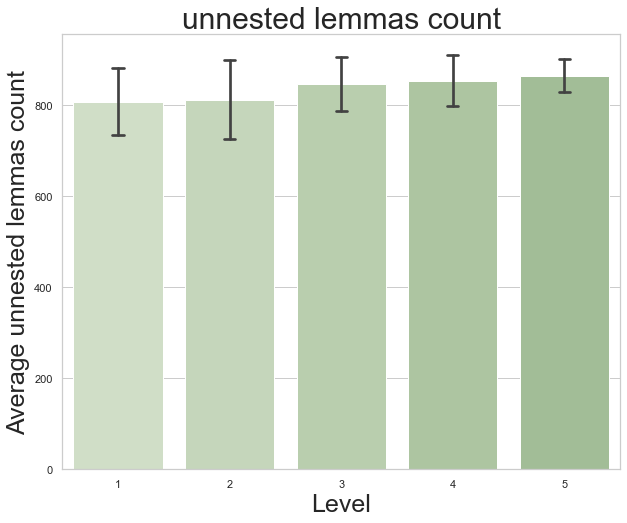

In [9]:
plot_feature(df['level'], df['unnested_lemmas_count'])

Text(0, 0.5, 'Average count of noun')

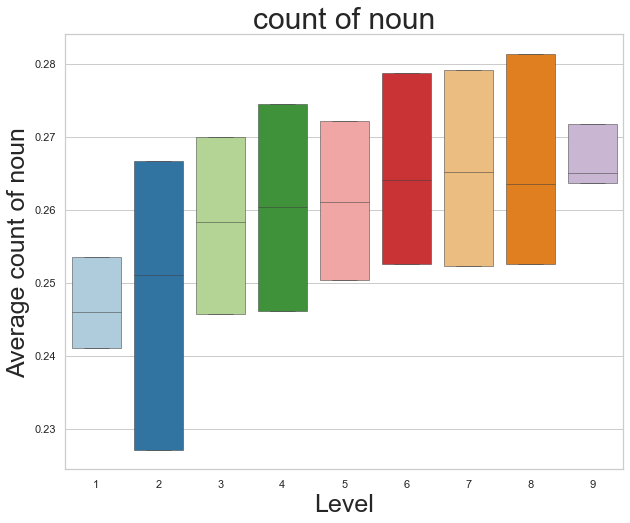

In [195]:
level = df['score']
data = df['count_of_noun']
fig = plt.figure( figsize=(10,8) )
sns.set(style="whitegrid")
title = (' ').join((data.name).split('_'))
y_axis = 'Average ' + title
ax = ax = sns.boxplot(level, data, showfliers = False, whis = 0, palette ="Paired", linewidth = 0.5)
ax.set_title(title, fontsize = 30)
ax.set_xlabel('Level', fontsize=25)
ax.set_ylabel(y_axis, fontsize=25)

## Exploring words in  the text for features.

In [109]:
df['frequency_word_wok'] = 0
wok_terms = [r"\breason", r"\bfaith", r"\bmemory", r"\bsense( of | )perception", r"\bintuition", r"\bimagination", r"\blanguage", r"\bemotion"]

for i,_ in df.iterrows():
    count = 0
    for term in wok_terms:
        count += len(re.findall(term, df.at[i, 'text']))
    df.at[i,'frequency_word_wok'] = count
df.groupby('level')['frequency_word_wok'].mean(),df.groupby('level')['frequency_word_wok'].std()


(level
 1     9.081633
 2     9.768182
 3    11.389937
 4    12.906250
 5    15.600000
 Name: frequency_word_wok, dtype: float64,
 level
 1    7.415740
 2    8.061742
 3    8.899518
 4    8.394478
 5    7.700649
 Name: frequency_word_wok, dtype: float64)

In [21]:
df['frequency_key_words'] = 0
key_terms = [r"\bproduction", r"\bacquisition"]
for i,_ in df.iterrows():
    count = 0
    for term in key_terms:
        count += len(re.findall(term, df.at[i, 'text']))
    df.at[i,'frequency_key_words'] = count
df.groupby('level')['frequency_key_words'].mean(),df.groupby('level')['frequency_key_words'].std()


(level
 1    4.428571
 2    5.581081
 3    7.088050
 4    7.796875
 5    8.600000
 Name: frequency_key_words, dtype: float64,
 level
 1     5.642104
 2     6.980270
 3     7.637668
 4     7.896513
 5    11.414903
 Name: frequency_key_words, dtype: float64)

In [19]:
df['frequency_argument_words'] = 0
# argument_terms = [r"however", r"on the one hand", r"\bmoreover", r"\bafter all",  r"\bthat is why", r"\bin contrast to", r"\bnot only", r"\bnot only", r"\bnevertheless", r"\bconversely"]
argument_terms = [r"however", r"on the one hand", r"\bmoreover", r"\bafter all", r"\bthat is why", r"\bin contrast to", r"\bnot only", r"\bnot only", r"\bnevertheless", r"\bconversely"]
for i,_ in df.iterrows():
    count = 0
    for term in argument_terms:
        count += len(re.findall(term, df.at[i, 'text']))
    df.at[i,'frequency_argument_words'] = count
df.groupby('level')['frequency_argument_words'].mean(),df.groupby('level')['frequency_argument_words'].std()


(level
 1    5.959184
 2    6.031532
 3    6.528302
 4    6.453125
 5    5.000000
 Name: frequency_argument_words, dtype: float64,
 level
 1    3.390914
 2    2.961884
 3    2.986915
 4    3.044275
 5    3.082207
 Name: frequency_argument_words, dtype: float64)

In [114]:
df['frequency_absolute_words'] = 0
absolute_terms = [r"always", r"never"]

for i,_ in df.iterrows():
    count = 0
    for term in absolute_terms:
        count += len(re.findall(term, df.at[i, 'text']))
    df.at[i,'frequency_absolute_words'] = count
df.groupby('level')['frequency_absolute_words'].mean(),df.groupby('level')['frequency_absolute_words'].std()


(level
 1    2.346939
 2    2.200000
 3    2.276730
 4    1.937500
 5    1.400000
 Name: frequency_absolute_words, dtype: float64,
 level
 1    2.437135
 2    2.276744
 3    2.143320
 4    1.815935
 5    1.673320
 Name: frequency_absolute_words, dtype: float64)

In [108]:
df['frequency_word_aok'] = 0
aok_terms = [r"\bmath", r"\bart", r"\bhistor", r"\breligio", r"\behtic", r"\bhuman s", r"\bnatur(al|e) science", r"\bsystem"]
for i,_ in df.iterrows():
    count = 0
    for term in aok_terms:
        count += len(re.findall(term, df.at[i, 'text']))
    df.at[i,'frequency_word_aok'] = count
df.groupby('level')['frequency_word_aok'].mean(),df.groupby('level')['frequency_word_aok'].std()

(level
 1    22.510204
 2    25.318182
 3    27.465409
 4    31.062500
 5    26.200000
 Name: frequency_word_aok, dtype: float64,
 level
 1    13.456910
 2    14.476832
 3    13.517349
 4    16.240137
 5    14.131525
 Name: frequency_word_aok, dtype: float64)

In [107]:

# re.findall(r"\w+ly", text)

r'"math"
r'"art"
r'"histor"
r'"religio"
r'"ehtic"
r'"human s"
r'"^natur(al|e) science"
r'"system"


In [91]:
df

,text,year,name,title,score,level,title_name,frequency_word_aok,frequency_word_wok
0,the question is asking that in the same discip...,2017,"4, 5 - Est_Chen-fzn235-TOK_essay.docx",5,4,2,given access to the same facts how is it poss...,42,25
1,our brains seek coherence structure and order ...,2017,"7, 6 - Eva GuoTOK_final_final_draft.docx",6,7,4,humans are pattern seeking animals and we are ...,5,11
2,in american heritage dictionary of the english...,2017,"7, 5 - fzn260_Yessica_Ji_Yuanyi_G12-9_TOKEssay...",5,7,4,given access to the same facts how is it poss...,16,8
3,the statement in the prompt argues that diffic...,2017,"8, 1 - James Li TOK_Essay_4th_draft.docx",1,8,4,it is only knowledge produced with difficulty ...,9,3
4,human are patternseeking animals because patte...,2017,"7, 6 - Fzn323_Amy_Wang_Qiaohui_G12_TOK_Essay_D...",6,7,4,humans are pattern seeking animals and we are ...,32,2
...,...,...,...,...,...,...,...,...,...
492,strong and valid knowledge is not generated on...,2018,"5, 6 - gny293-Billy_Mai_Junhao_G12-3_TOK_Essay...",6,5,3,robust knowledge requires both consensus and d...,19,10
493,smartphones apollo project and genetic modific...,2018,"2, 5 - gny275-Hiram_Ma_Jun_G12-3_TOK_Essay_Dra...",5,2,1,the quality of knowledge produced by an academ...,20,4
494,uniformities are common patterns across the hu...,2018,"6, 3 - gny260_3_1599.docx",3,6,3,without the assumption of the existence of uni...,19,34
495,there are a thousand hamlets in a thousand peo...,2018,"4, 6 - gny370-6-1594.docx",6,4,2,robust knowledge requires both consensus and d...,13,9
